In [1]:
#all necessary packages
from __future__ import print_function,division
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gp
import pylab as pl
import json
import urllib2
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

#s = json.load( open(os.getenv('PUIDATA')+'/fbb_matplotlibrc.json') )
#pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv(os.getenv("PUIDATA")+"/201606-citibike-tripdata.csv")

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [4]:
df['age'] = 2016 - df['birth year']
df['age'].dropna(inplace= True)
df_age = df['age']
#df_age.describe()

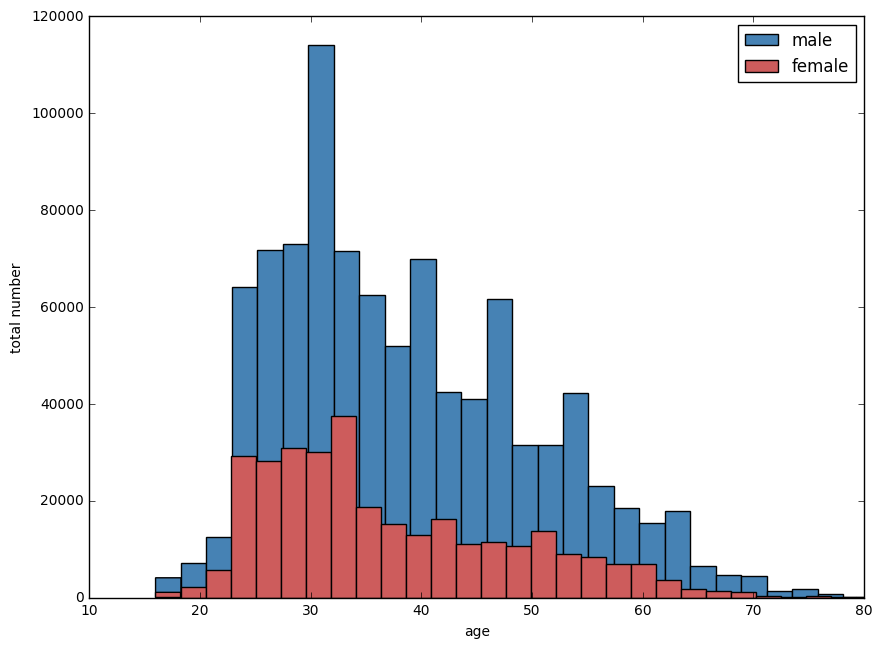

In [13]:
fig=pl.figure(figsize(10,7.5))
#bins = np.arange(10, 99, 5)
plt.hist(df_age[df.gender==1],bins=50,color='Steelblue',label='male')
plt.hist(df_age[df.gender==2],bins=50,color='Indianred',label='female')
plt.xlim(10,80)
#plt.axis([10,80,0,250000])
#ax = (df_age[df.gender==1].groupby(pd.cut(df.age[df.gender==1], bins)).agg([count_nonzero]).plot(
    #kind='bar', legend=False))
#(df_age[df.gender==2].groupby(pd.cut(df.age[df.gender==2], bins)).agg([count_nonzero]).plot(
    #kind='bar',legend=False))
plt.xlabel("age")
plt.ylabel("total number")
plt.legend()
plt.show()

##     Figure 1: June 2016 Citibike Riders  histogram by age group and gender

In [15]:
#fig=pl.figure(figsize(10,7.5))
#bins = np.arange(10, 99, 5)
#ax=fig.add_subplot(111)
#(df_age[df.gender==1].groupby(pd.cut(df.age[df.gender==1], bins)).agg([count_nonzero]).plot(
    #kind='bar', legend=False))
#(df_age[df.gender==2].groupby(pd.cut(df.age[df.gender==2], bins)).agg([count_nonzero]).plot(
    #kind='bar', legend=False))

In [ ]:
#plot
#fig = pl.figure(7,figsize=(5,5))
#ax = fig.add_subplot(111)
#ax.set_xlabel("Male Median Income",fontsize=10)
#ax.set_ylabel("Female Median Income",fontsize=10)
#ax.plot(np.arange(0.,60000.,10000), np.arange(0.,60000.,10000), color='IndianRed')
#ax.plot(all_males, all_females, '*', lw=2, color='SteelBlue')
#plt.axis([0, 50000, 0, 50000])